# Honey Production

Now that you have learned how linear regression works, let’s try it on an example of real-world data.

As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

##  1.

- We have loaded in a DataFrame for you about honey production in the United States from Kaggle. It is called df and has the following columns:
    - `state`
    - `numcol`
    - `yieldpercol`
    - `totalprod`
    - `stocks`
    - `priceperlb`
    - `prodvalue`
    - `year`
- Use `.head()` to get a sense of how this DataFrame is structured.

In [4]:
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


##  2.

- For now, we care about the total production of honey per year. 
- Use the `.groupby()` method provided by `pandas` to get the mean of `totalprod` per year.
- Store this in a variable called `prod_per_year`.

In [7]:
mean_prod_per_year = df.groupby('year').totalprod.mean().reset_index()
mean_prod_per_year.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


##  3.

- Create a variable called `X` that is the column of `year`s in this `prod_per_year` DataFrame.
- After creating `X`, we will need to reshape it to get it into the right format, using this command:
    ```py
    X = X.values.reshape(-1, 1)
    ```

In [9]:
X = mean_prod_per_year['year'].values.reshape(-1, 1)
X.shape

(15, 1)

##  4.

- Create a variable called `y` that is the `totalprod` column in the `prod_per_year` dataset.

In [15]:
y = mean_prod_per_year['totalprod'].values.reshape(-1, 1)
y.shape

(15, 1)

##  5.

- Using `plt.scatter()`, plot `y` vs `X` as a scatterplot.
- Display the plot using `plt.show()`.
- Can you see a vaguely linear relationship between these variables?

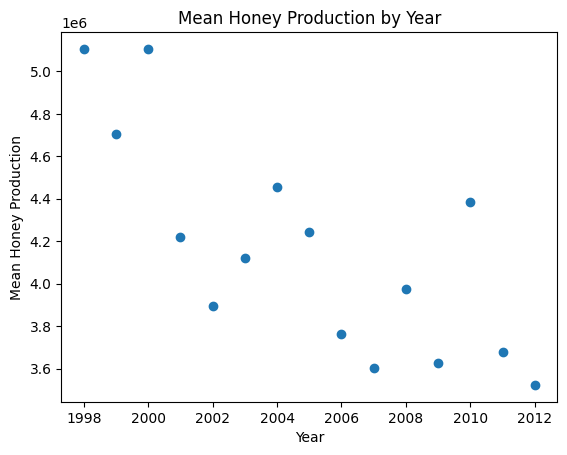

In [16]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Mean Honey Production')
plt.title('Mean Honey Production by Year')
plt.show()

##  6.

- Create a linear regression model from scikit-learn and call it `regr`.
- Use the `LinearRegression()` constructor from the `linear_model` module to do this.

In [17]:
regr = linear_model.LinearRegression()

##  7.

- Fit the model to the data by using `.fit()`. 
- You can feed `X` into your `regr` model by passing it in as a parameter of `.fit()`.

In [18]:
regr.fit(X, y)

LinearRegression()

##  8.

- After you have fit the model, print out the slope of the line (stored in a list called `regr.coef_`) and the intercept of the line (`regr.intercept_`).

In [19]:
regr.coef_, regr.intercept_

(array([[-88303.18915238]]), array([1.81208083e+08]))

##  9.

- Create a list called `y_predict` that is the predictions your regr model would make on the `X` data.

In [20]:
y_predict = regr.predict(X)

##  10.

- Plot `y_predict` vs `X` as a line, on top of your scatterplot using `plt.plot()`.
- Make sure to call `plt.show()` after plotting the line.

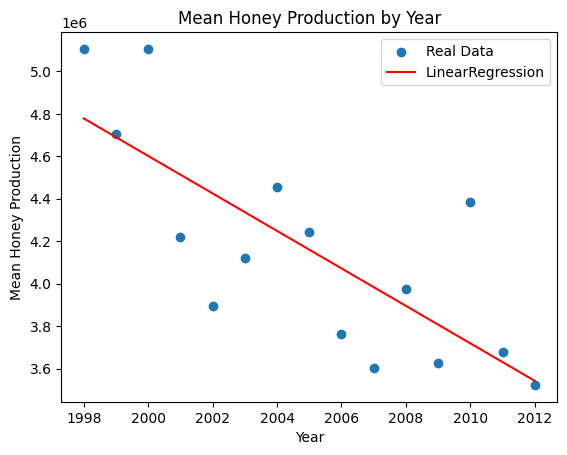

In [21]:
plt.scatter(X, y, label='Real Data')
plt.plot(X, y_predict, color='red', label="LinearRegression")
plt.xlabel('Year')
plt.ylabel('Mean Honey Production')
plt.title('Mean Honey Production by Year')
plt.legend()
plt.show()

##  11.

- So, it looks like the production of honey has been in decline, according to this linear model. 
- Let’s predict what the year `2050` may look like in terms of honey production.
- Our known dataset stops at the year `2013`, so let’s create a NumPy array called `X_future` that is the range from `2013` to `2050`.
-  The code below makes a NumPy array with the numbers 1 through 10
    ```py
    nums = np.array(range(1, 11))
    ```
- After creating that array, we need to reshape it for scikit-learn.
    ```py
    X_future = X_future.reshape(-1, 1)
    ```
- You can think of `reshape()` as rotating this array. 
- Rather than one big row of numbers, `X_future` is now a big column of numbers — there’s one number in each row.
- `reshape()` is a little tricky! It might help to print out `X_future` before and after reshaping.

In [22]:
X_future = np.array(range(2013, 2051)).reshape(-1, 1)

##  12.

- Create a list called `future_predict` that is the y-values that your `regr` model would predict for the values of `X_future`.

In [23]:
future_predict = regr.predict(X_future)

##  13.

- Plot `future_predict` vs `X_future` on a different plot.
- How much honey will be produced in the year 2050, according to this?

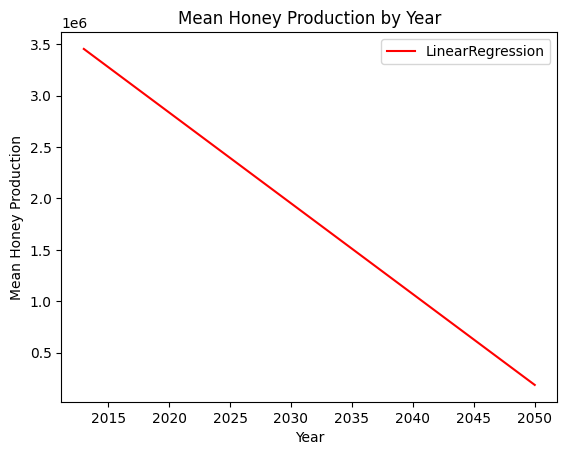

In [25]:
plt.plot(X_future, future_predict, color='red', label="LinearRegression")
plt.xlabel('Year')
plt.ylabel('Mean Honey Production')
plt.title('Mean Honey Production by Year')
plt.legend()
plt.show()